## Summary and Results
The US Census data set used in this machine learning project has 40 features (6 continuous and 34 nominal) and close to 200,000 rows, where each row corresponds to a person. The object is to develop a binary classification model that predicts whether or not a person has greater than or less than $50,000 in savings.  

Before any modelling takes place, we begin by analyzing and visualizing the data to make sure we have a clear understanding of its structure. This analysis is described in this Jupyter Notebook, subdivided into the following sections:

<ol>
<li> <b>Training Data Preprocessing</b> <br>
The training data is loaded into a Pandas DataFrame. The <b><i>instance_weight</i></b> column is dropped, as per the instructions. A total of 46,627 duplicate rows are removed. The size of the pre-processed raw data set is 152,896 rows and 40 features.
<br>
<br>
<li> <b>The Continuous Variables</b> <br>
There are 6 continuous variables that are analyzed. We find that 4 of them (<b><i>wage_per_hour</i></b>, <b><i>capital_gains</i></b>, <b><i>capital_losses</i></b> and <b><i>dividends</i></b>) are highly skewed and have large ranges. We recommend that special care should be taken in handling these features when it comes to modelling, including rescalings, and possible binning of the tails. 
<br>
<br>
<li> <b>Correlation Analysis</b> <br>
We calculate and plot the correlations between the continuous variables and find that there are no strong correlations.
<br>
<br>
<li> <b>The Nominal Columns</b> <br>
There are 15 nominal columns that are well defined (not mising values). Histograms broken down by the target variable are plotted. There are no major findings though the following suggestions are made for modelling:
<ul>
<li> <b><i>detailed_household_family_stat:</b></i> This variable has 19 classes which do not map to the savings greater than 50K class. Perhaps these could be combined into one class.
<li> <b><i>education:</b></i> There are 2 classes for which the imbalance appears to be minimal: "Prof school degree (MD DDS DVM LLB JD)" and "Doctorate degree (PhD EdD)". Perhaps these should be treated separately.
</ul>
<br>
<li> <b>The Nominal Columns with Undefined or Missing Values</b> <br>
There are 19 variables that have undefined or missing values. The missing or undefined values generally come in the form of "Not in universe" or "?"s in some cases. Histograms are plotted to examine the distribution of classes.
<ul>
<li> <b><i>family_members_under_18:</i></b> This variable has three classes for which there are zero persons with savings greater than 50K. Perhaps these could be combined into one class.
</ul>
<br>
<li> <b>Examination of Class Imbalance</b> <br>
The training data exhibits a pretty severe degree of imbalance. Approximately 91% of all persons have savings less than 50K. This means that a model that classifies every person as having less than 50K in savings will be correct 91% of the time. This imbalance suggests that we should not rely on accuracy to compare classification models but perhaps rely on other metrics such as precision or recall. Additionally, we should consider trying techniques that address imbalance, such as undersampling, oversampling, various clustering approaches and more...
<br>
<br>
<li> <b>Convert Nominal Columns from Dtype Object to Dtype Integer</b> <br>
Two new data sets are created. In the first one, we convert the nominal columns from categorical to integer valued. This data set has 40 features and is used in the random forest classifications in Section 8. In the second data set, we one-hote encode the nominal columns. The resulting data set has 560 columns and is used in the logistic regressions computed in Section 8.
<br>
<br>
<li> <b>Feature Importance And Unimportance</b> <br>
We run several machine learning models to get a sense of the important features in the data set as well as the features that are not important. We employ cross validation to make sure that the models are reasonably accurate, though a highly tuned model isn't the goal here. 
<ul>
<li> <b>Feature Importance using a Random Forest</b><br>
Fit a modest random forest with 10 trees and 10 max leaves. The 9 most important features are, in decreasing order: <ul>
<li><b><i>capital_gains</i></b>
<li><b><i>dividends</i></b>
<li><b><i>detailed_occupation_code</i></b>
<li><b><i>age</i></b>
<li><b><i>education</i></b>
<li><b><i>detailed_industry_code</i></b>
<li><b><i>major_occupation_code</i></b>
<li><b><i>weeks_worked_in_year</i></b>
<li><b><i>sex</i></b>. 
</ul>
<br> 
<br>
<li> <b>Feature Importance Using Individual Random Forests</b><br>
The second calculation consists of 40 random forests (10 trees, max depth of 10), one for each feature. This approach neglects correlations and dependencies between each feature and examines each feature in isolation. Here are the top five features with the highest accuracy in descending order: 
<ul>
<li><b><i>capital_gains</i></b>
<li><b><i>capital_losses</i></b>
<li><b><i>detailed_occupation_code</i></b>
<li><b><i>education</i></b>
<li><b><i>dividends</i></b>
</ul
<br>
<br>
<li> <b>L2 logistic regression to find unimportant features</b><br>
We use the one-hot-encoded data set for logistic regression and find all columns whose coefficients are closest to 0. This gives us a sense for the features that are least important. The actual results apply to the one-hot encoded columns, but we map these back to the original columns as long as the majority of the classes are deemed to be unimportant. A feature is deemed to be unimportant if it's coefficient is less than 5% of the max and min. The features that are found to be unimportant are:
<ul>
<li> <b><i>detailed_household_family_stat</i></b>
<li> <b><i>full_or_part_time_employment_stat</i></b>
<li> <b><i>tax_filer</i></b>
<li> <b><i>state_of_previous_residence</i></b>
<li> <b><i>cob_father</i></b>
<li> <b><i>migration_code_change_in_msa</i></b>
<li> <b><i>marital_status</i></b>
<li> <b><i>migration_code_change_in_reg</i></b>
<li> <b><i>cob_self</i></b>
<li> <b><i>cob_mother</i></b>
</ul>
<br>
<br>
<li> <b> L1 logistic regression to find unimportant features</b><br>
We use the one-hot-encoded data set for logistic regression and find all columns whose coefficients are closest to 0. This allows us to identify the features that are least important. The analysis applies to the one-hot encoded columns, but we map these back to the original columns as long as the majority of the classes have coefficient 0. The features that are found to be unimportant are: 
<ul>
<li> <b><i>reason_for_unemployment</i></b>
<li> <b><i>year</i></b>
<li> <b><i>migration_code_move_within_reg</i></b>
<li> <b><i>migration_code_change_in_reg</i></b>
<li> <b><i>migration_prev_res_in_sunbelt</i></b>
<li> <b><i>migration_code_change_in_msa</i></b>
<li> <b><i>veterans_benefits</i></b>
<li> <b><i>family_members_under_18</i></b>
<li> <b><i>state_of_previous_residence</i></b>
<li> <b><i>cob_mother</i></b>
<li> <b><i>cob_father</i></b>
<li> <b><i>cob_self</i></b>
<li> <b><i>detailed_household_family_stat</i></b>
<li> <b><i>weeks_worked_in_year</i></b>
<li> <b><i>hispanic_origin</i></b>
</ul>
</ul>
<br>
<br>
</ol>




In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import textwrap
from collections import Counter

In [2]:
%matplotlib inline

## 1. Training Data Preprocessing

In [3]:
# the_columns stores tuples of (column_name and tag for continuous/nominal/binary/target)
the_columns  = [('age', 'continuous'), 
            ('class_of_worker', 'nominal'), 
            ('detailed_industry_code', 'nominal'), 
            ('detailed_occupation_code', 'nominal'), 
            ('education', 'nominal'), 
            ('wage_per_hour', 'continuous'), 
            ('enrolled_in_edu_last_week', 'nominal'),
            ('marital_status', 'nominal'),
            ('major_industry_code', 'nominal'),
            ('major_occupation_code', 'nominal'),
            ('race', 'nominal'),
            ('hispanic_origin', 'nominal'),
            ('sex', 'binary'), # binary column with values Male/Female
            ('member_of_labor_union', 'nominal'), 
            ('reason_for_unemployment', 'nominal'),
            ('full_or_part_time_employment_stat', 'nominal'),
            ('capital_gains', 'continuous'),
            ('capital_losses', 'continuous'),
            ('dividends', 'continuous'),
            ('tax_filer', 'nominal'),
            ('region_of_previous_residence', 'nominal'),
            ('state_of_previous_residence', 'nominal'),
            ('detailed_household_family_stat', 'nominal'),
            ('detailed_household_summary', 'nominal'),
            ('instance_weight', 'IGNORE'), # as per instructions, to be dropped
            ('migration_code_change_in_msa', 'nominal'),
            ('migration_code_change_in_reg', 'nominal'),
            ('migration_code_move_within_reg', 'nominal'),
            ('live_in_this_house_1_yr_ago', 'nominal'),
            ('migration_prev_res_in_sunbelt', 'nominal'),
            ('num_persons_worked_for_employer', 'continuous'),
            ('family_members_under_18', 'nominal'),
            ('cob_father', 'nominal'),
            ('cob_mother', 'nominal'),
            ('cob_self', 'nominal'),
            ('citizenship', 'nominal'),
            ('own_business_or_self_employed', 'nominal'),
            ('fill_in_questionnaire_for_veterans_admin', 'nominal'),
            ('veterans_benefits', 'nominal'),
            ('weeks_worked_in_year', 'nominal'),
            ('year', 'nominal'), 
            ('savings','target')] # binary TARGET column with values '50000+.' and '- 50000.'

In [4]:
raw_data = pd.read_csv('us_census_full/census_income_learn.csv', 
                       names=[c[0] for c in the_columns], 
                       index_col=False)

Because of this:
> <i>The instance weight indicates the number of people in the population that each record represents due to stratified sampling. To do real analysis and derive conclusions, this field must be used. This attribute should *not* be used in the classifiers, so it is set to "ignore" in this file.

We drop the <b><i>instance_weight</b></i> field.

In [5]:
raw_data.drop('instance_weight', axis=1, inplace=True)
#the_columns.remove(('instance_weight', 'IGNORE'))

In [6]:
original_shape = raw_data.shape
print '\nThe raw data (minus the instance_weight variable) has',
print '{:d} rows and {:d} columns.'.format(original_shape[0], original_shape[1])

print 'As a sanity check, this agrees with the number of lines (199523) obtained',
print 'using the "wc -l" Unix command.\n'
assert original_shape[0] == 199523, "The number of rows is incorrect"

# note the original unaltered file contains 199523 lines as verified using Unix wc command:
# > wc -l census_income_learn.csv
# 199523


The raw data (minus the instance_weight variable) has 199523 rows and 41 columns.
As a sanity check, this agrees with the number of lines (199523) obtained using the "wc -l" Unix command.



In [7]:
raw_data.head().transpose()

,0,1,2,3,4
age,73,58,18,9,10
class_of_worker,Not in universe,Self-employed-not incorporated,Not in universe,Not in universe,Not in universe
detailed_industry_code,0,4,0,0,0
detailed_occupation_code,0,34,0,0,0
education,High school graduate,Some college but no degree,10th grade,Children,Children
wage_per_hour,0,0,0,0,0
enrolled_in_edu_last_week,Not in universe,Not in universe,High school,Not in universe,Not in universe
marital_status,Widowed,Divorced,Never married,Never married,Never married
major_industry_code,Not in universe or children,Construction,Not in universe or children,Not in universe or children,Not in universe or children
major_occupation_code,Not in universe,Precision production craft & repair,Not in universe,Not in universe,Not in universe


### Eliminate Duplicate Rows

In [8]:
# find the duplicate rows, keep the first one
duplicate_rows = raw_data.duplicated(keep='first')

print '\nnumber of duplicates = {:d}'.format(duplicate_rows.sum())
raw_data = raw_data.drop_duplicates(keep='first')
new_shape =  raw_data.shape
print 'number of duplicates removed = {:d}'.format(original_shape[0] - new_shape[0])
print 'new shape = {:d}, {:d}\n'.format(raw_data.shape[0], raw_data.shape[1])


number of duplicates = 46627
number of duplicates removed = 46627
new shape = 152896, 41



### Convert to Boolean Columns

<ul>
<li> Map the values in the <b><i>savings</b></i> column from '50000+.' to 1 and 0 otherwise.
<li> Map the values in the <b><i>sex</b></i> column from Male/Female to 1/0.
</ul>

In [9]:
raw_data['savings'] = raw_data['savings'].map(
    lambda x: 1 if str(x).strip() == '50000+.' else 0)
print raw_data['savings'].sum()

12367


In [10]:
raw_data['sex'] = raw_data['sex'].map(
    lambda x: 1 if str(x).strip() == 'Male' else 0)
print raw_data['sex'].sum()

74190


## 2. The Continuous Variables


In [11]:
no_savings = raw_data[raw_data['savings'] == 0]
has_savings = raw_data[raw_data['savings'] == 1]

In [12]:
def plot_histograms(column, xlabel, bins=41, title=None, figsize=(8,2), legend_loc=None):
    '''
    Graphs two histograms for a given column on a single plot: a histogram for savings 
    less than 50K and another for savings greater than 50K. The vertical axis is plotted 
    on a log-scale.
    '''
    if title is None:
        title=xlabel
    fig=plt.figure(figsize=figsize);
    ax = fig.gca();
    ax0 = no_savings.hist(column=column, by='savings', ax=ax, bins=bins, 
                          xlabelsize=12, ylabelsize=12, alpha=0.9);
    ax1 = has_savings.hist(column=column, by='savings', ax=ax, bins=bins, 
                           color='red', alpha=0.6);
    ax.set_xlabel(xlabel, fontsize=12)
    ax.set_yscale('log')
    ax.set_ylim(bottom=1)
    ax.set_ylabel('Count', fontsize=12)
    ax.set_title(title, fontsize=16)
    if legend_loc == 'in':
        ax.legend(('Savings < 50K', 'Savings > 50K'), fontsize=12);
    else:
        ax.legend(('Savings < 50K', 'Savings > 50K'), fontsize=12, 
                  loc='center left', bbox_to_anchor=(1,0.5));
    return ax

### Summary Statistics
There are 6 features that are continous. These are listed below along with some summary statistics, including quantiles up to 99.9%. These show that <b><i>wage_per_hour</b></i>, <b><i>capital_gains</b></i>, <b><i>capital_losses</b></i> and <b><i>dividends</b></i> are highly skewed. 

In [13]:
continuous_columns = [c[0] for c in the_columns if c[1] == 'continuous']
summary_stats = raw_data[continuous_columns].describe(
    percentiles=[.50, .90, .95, .99, .999]).transpose()
summary_stats

,count,mean,std,min,50%,90%,95%,99%,99.9%,max
age,152896.0,39.719371,19.662074,0.0,38.0,68.0,75.0,86.00,90.0,90.0
wage_per_hour,152896.0,72.324279,312.072448,0.0,0.0,0.0,650.0,1530.00,2700.0,9999.0
capital_gains,152896.0,567.237115,5359.204656,0.0,0.0,0.0,0.0,14084.00,99999.0,99999.0
capital_losses,152896.0,48.664471,309.511387,0.0,0.0,0.0,0.0,1944.00,2603.0,4608.0
dividends,152896.0,257.019255,2261.405280,0.0,0.0,100.0,672.0,5751.95,30000.0,99999.0
num_persons_worked_for_employer,152896.0,2.538052,2.403920,0.0,2.0,6.0,6.0,6.00,6.0,6.0


### age
The histograms for the <b><i>age</b></i> variable are plotted below, split up between the savings classes. The y-axes is plotted on the log-scale. Note that the histograms exhibit class imbalance of roughly an order of magnitude. This will be the case for the majority of the histograms plotted below, and a subject that is examined in Section 6.

The histograms for <b><i>age</b></i> exhibit expected behavior. There are no persons below the age of 16 that have savings in excess of 50K. The distribution for savings greater than 50K exhibits a unimodal shape with a peak that lies roughly between 40 and 50.

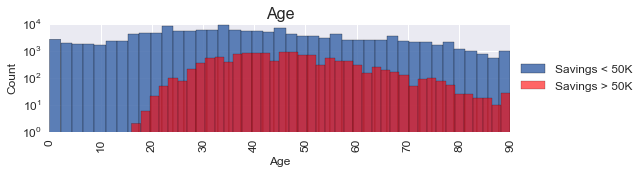

In [14]:
ax = plot_histograms(column='age', xlabel='Age');

### wage_per_hour
According to the summary statistics displayed above, the 90% quantile for <b><i>wage_per_hour</b></i> is 0, and the hourly wage for the 99th percentile is 1530. The maximum value is 9999.0 (which seems like an artificial upper limit). As shown below, the minimum non-zero hourly wage is 20. These observations bring up some questions:
<ul>
<li> How do we interpret this data? Is this data correct? Are we to understand that 90% of the test set have no hourly income and that the minimum non-zero hourly wage is 20? Could this feature be mislabeled and in reality represent a quantity other than wage per hour?
<li> What are the units of this variable? If the units are dollars per hour, then why are there no minimum wage earners, which would be closer to \$7-\$15/hour rather than the non-zero minimum of 20? 
</ul>

Two histograms are plotted below for <b><i>wage_per_hour</b></i> Interestingly enough, there are more high wages greater than 4000 for the case where <b><i>savings</b></i> is less than 50K. 

These observations suggest some feature engineering is warranted for this variable. Here are some potential avenues of exploration:
<ol>
<li> A scaling could be introduced to reduce the range.
<li> To address the long tail, should we converting this feature from continuous to binary in the tail? Is there a difference between somebody who earns 5,000 and 10,000?
</ol>



The minimum non-zero hourly wage is 20.
There are 141,594 persons earning 0.
There are 11,302 persons earning more than 0.



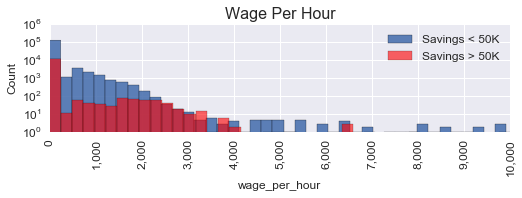

In [15]:
rich = raw_data['wage_per_hour'] > 0.0
not_rich = raw_data['wage_per_hour'] == 0.0

print '\nThe minimum non-zero hourly wage is {:g}.'.format(
    raw_data['wage_per_hour'][rich].min())
print 'There are {:,d} persons earning 0.'.format(not_rich.sum())
print 'There are {:,d} persons earning more than 0.\n'.format(rich.sum())

ax = plot_histograms(column='wage_per_hour', xlabel='wage_per_hour', 
                     title='Wage Per Hour', legend_loc='in')
ax.set_xticks(range(0,10001,1000));
ax.set_xticklabels('{:,d}'.format(i) for i in range(0, 10001, 1000));

### capital_gains
Many of the observations made for the summary statistics of <b><i>wage_per_hour</b></i> also apply to <b><i>capital_gains</b></i>. The majority of persons have 0 capital gains, and the max is at 99,999.

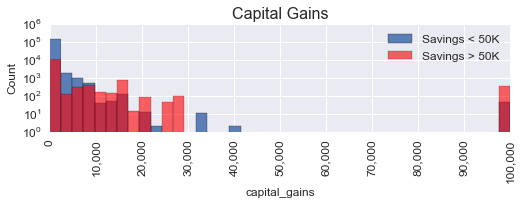

In [16]:
ax = plot_histograms(column='capital_gains', xlabel='capital_gains', 
                     title='Capital Gains', legend_loc='in')
ax.set_xticks(range(0,100001,10000));
ax.set_xticklabels('{:,d}'.format(i) for i in range(0, 100001, 10000));

### capital_losses
Many of the observations made for the summary statistics of <b><i>wage_per_hour</b></i> also apply to <b><i>capital_losses</b></i>. The majority persons have 0 capital losses and the maximum value is 4,608, which does not seem limited by an artifical constraint.

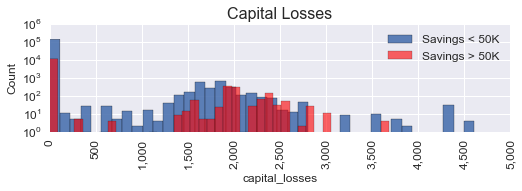

In [17]:
ax = plot_histograms(column='capital_losses', xlabel='capital_losses', 
                     title='Capital Losses', legend_loc='in');
ax.set_xticks(range(0, 5001, 500));
ax.set_xticklabels('{:,d}'.format(i) for i in range(0, 5001, 500));

### dividends
The <b><i>dividend</b></i> variable exhibit different class imbalance for values greater than 0.

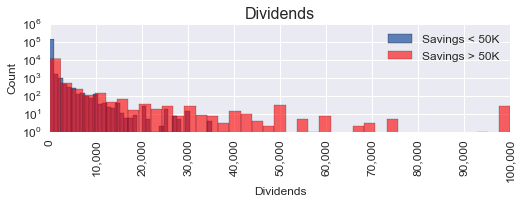

In [18]:
ax = plot_histograms(column='dividends', xlabel='Dividends', legend_loc='in');
ax.set_xticks(range(0, 100001, 10000))
ax.set_xticklabels('{:,d}'.format(i) for i in range(0, 100001, 10000));

### num_persons_worked_for_employer
The histograms for <b><i>num_persons_worked_for_employer</b></i> are displayed below. One third of all persons in the data set do not employ other persons. The vertical axis of the histograms are on a linear scale to display the differences in the class counts. This displays the wide variability between class counts as well as the large class imbalance.

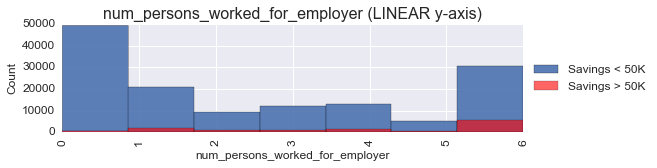

In [19]:
ax = plot_histograms(column='num_persons_worked_for_employer', 
                     xlabel='num_persons_worked_for_employer', 
                     title='num_persons_worked_for_employer (LINEAR y-axis)', 
                     bins=7);
ax.set_yscale('linear');
ax.set_ylim((0,50000));

## 3. Correlation Analysis
The correlation matrix of the continuous variables is calculated and the corresponding colormap is plotted below. There are no strong correlations in the data.

In [20]:
corr = raw_data[continuous_columns].corr()

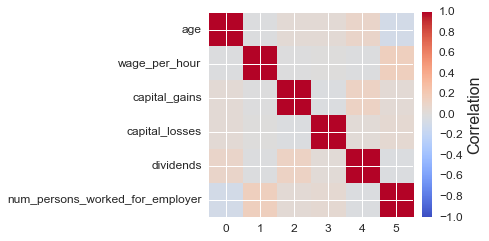

In [21]:
# plot correlation plot
fig, ax = plt.subplots(figsize=(4,4));
cax = ax.matshow(corr, cmap=plt.cm.coolwarm, vmin=-1, vmax=1);
cbar = plt.colorbar(cax, fraction=0.046, pad=0.04);
cbar.set_label('Correlation',size=16)
cbar.ax.tick_params(labelsize=12);
plt.yticks(range(corr.columns.values.shape[0]), fontsize=12);
ax.set_yticklabels(corr.columns.values);
ax.xaxis.set_ticks_position('bottom');
plt.xticks(fontsize=12);


## 4. The Nominal Columns
There are 15 nominal variables that do not have any missing or undefined values. 

In [22]:
def plot_nominal_column(column, figsize=(8.0,2.0), legend_loc=None, 
                        text_wrap_width=None, rotation=45):
    '''
    This function graphs bar-plots of a given nominal column broken 
    down by the savings variable. Since nominal data does not have numerical order, 
    the bars are plotted by descending order of counts for 0-savings persons.
    The vertical axis is on a log-scale.
    '''
    no_savings = raw_data[raw_data['savings']==0][[column,'savings']].groupby(column).count()
    no_savings.columns = ['0']
    
    has_savings = raw_data[raw_data['savings']==1][[column,'savings']].groupby(column).count()
    has_savings.columns = ['1']
    
    nominal_counts = pd.concat([no_savings, has_savings], axis=1)
    nominal_counts = nominal_counts.fillna(0).astype(np.int64)
    nominal_counts = nominal_counts.sort_values(by='1', ascending=False)
    nominal_counts['idx'] = np.array(range(nominal_counts.shape[0]))
    
    fig = plt.figure(figsize=figsize);
    ax = fig.gca();
    ax0 = nominal_counts.plot.bar(x='idx', y='0', ax=ax, 
                                  alpha=0.8, logy=True);
    ax1 = nominal_counts.plot.bar(x='idx', y='1', ax=ax, 
                                  color='r', alpha=0.5, logy=True);
    ax.set_ylim(bottom=0.5)
    ax.set_ylabel('Count', fontsize=12);
    ax.set_xlabel('')
    ax.set_xticks(nominal_counts.idx.values)
    if text_wrap_width:
        xlabels = [textwrap.fill(text, text_wrap_width) 
                   for text in nominal_counts.index.values]
    else:
        xlabels = nominal_counts.index.values
    ax.set_xticklabels(xlabels, rotation=rotation, fontsize=12, ha='right');
    if legend_loc == 'in':
        ax.legend(('Savings < 50K', 'Savings > 50K'), fontsize=12);        
    else:
        ax.legend(('Savings < 50K', 'Savings > 50K'), fontsize=12, loc='center left', 
                  bbox_to_anchor=(1.0,0.5));
    title=ax.set_title(column, fontsize=16);
    return ax


### citizenship

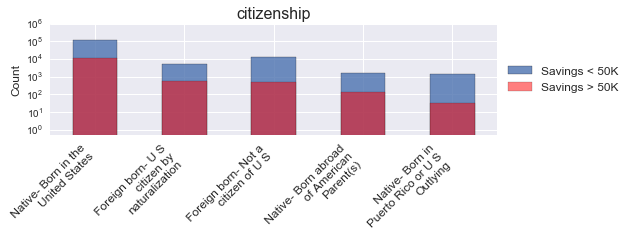

In [23]:
ax = plot_nominal_column('citizenship', text_wrap_width=20);

### detailed_household_summary

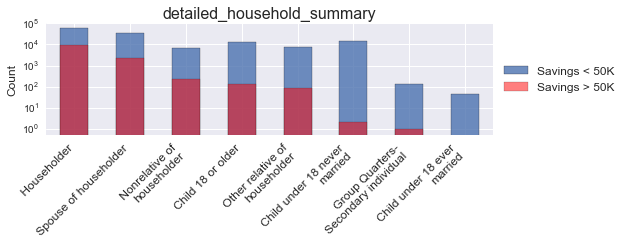

In [24]:
ax = plot_nominal_column('detailed_household_summary', text_wrap_width=24);

### detailed_household_family_stat
This variable has 19 classes that do not map to the greater than 50K in savings. It might be beneficial to combine these into one class.

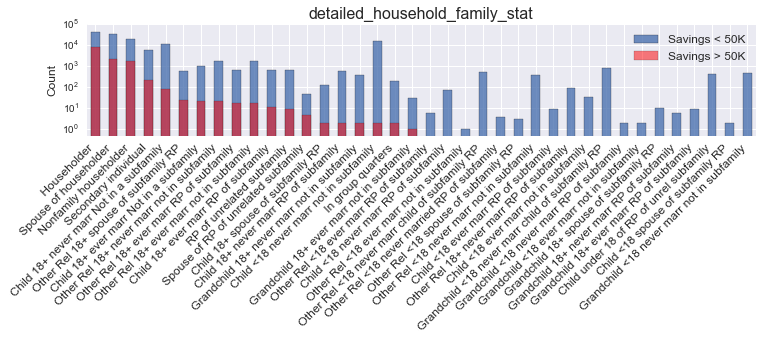

In [25]:
ax = plot_nominal_column('detailed_household_family_stat', figsize=(12,2), legend_loc='in');

### detailed_industry_code
The codes were not defined in the raw_data therefore it is unclear what industries these refer to.

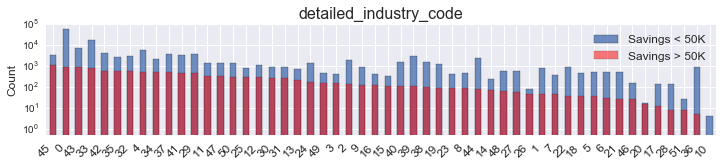

In [26]:
ax = plot_nominal_column('detailed_industry_code', figsize=(12,2), legend_loc='in');

### detailed_occupation_code
The codes were not defined in the raw_data therefore it is unclear what occupations these refer to.

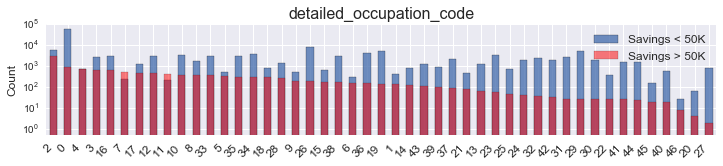

In [27]:
ax = plot_nominal_column('detailed_occupation_code', figsize=(12,2), legend_loc='in');

### education
There are 2 classes for which the imbalance appears to be minimal: "Prof school degree (MD DDS DVM LLB JD)" and "Doctorate degree (PhD EdD)". Perhaps these should be treated separately.

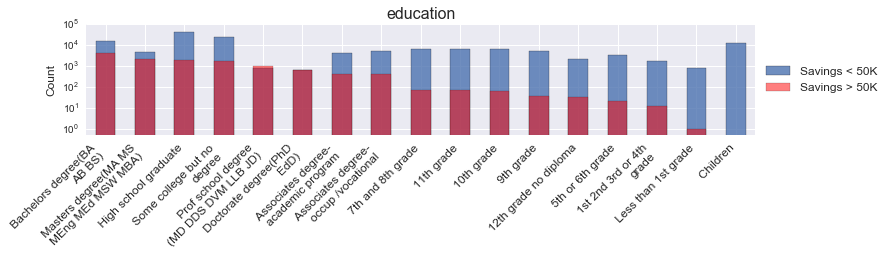

In [28]:
ax = plot_nominal_column('education', figsize=(12,2), text_wrap_width=22);

### full_or_part_time_employment_stat

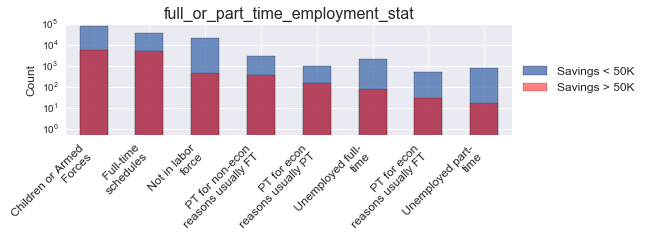

In [29]:
ax = plot_nominal_column('full_or_part_time_employment_stat', text_wrap_width=18);

### marital_status

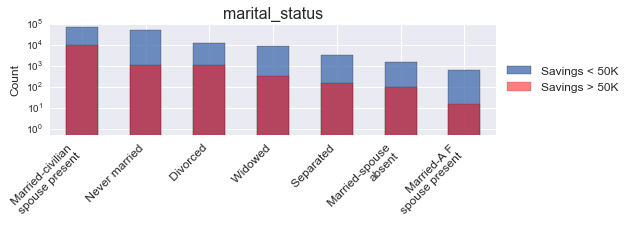

In [30]:
ax = plot_nominal_column('marital_status', text_wrap_width=18);

### own_business_or_self_employed
The classes were not defined in the original data set, thus it is unclear what {0,1,2} refer to.

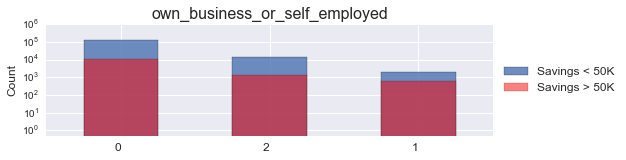

In [31]:
ax = plot_nominal_column('own_business_or_self_employed', rotation=0);

### race

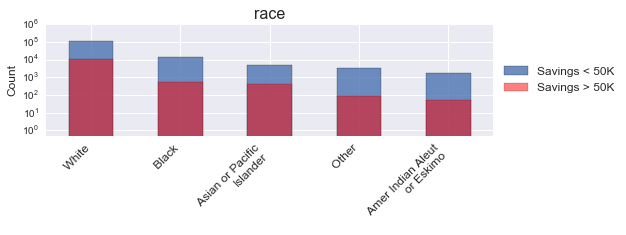

In [32]:
ax = plot_nominal_column('race', text_wrap_width=18);

### sex

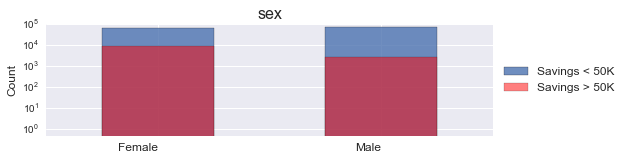

In [33]:
ax = plot_nominal_column('sex', rotation=0);
ax.set_xticklabels(('Female', 'Male'));

### tax_filer

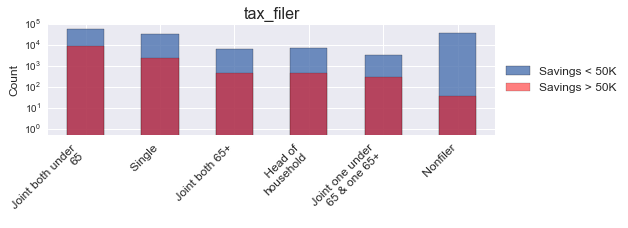

In [34]:
ax = plot_nominal_column('tax_filer', text_wrap_width=17);

### veterans_benefits
The classes were not defined in the original data set, thus it is unclear what {0,1,2} refer to. It is interesting to note that class 0 does not map to savings greater than 50K.

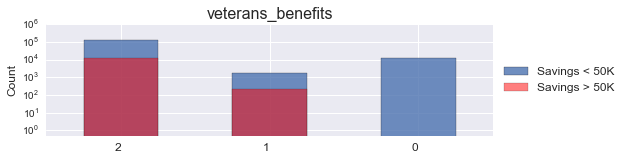

In [35]:
ax = plot_nominal_column('veterans_benefits', rotation=0);

### weeks_worked_in_year
The most frequent number of weeks worked in a year are 52 followed by 0.

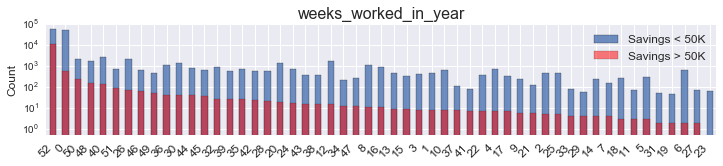

In [36]:
ax = plot_nominal_column('weeks_worked_in_year', figsize=(12,2), legend_loc='in');

### year
This variable determines when the data was collected: 1994 or 1995.

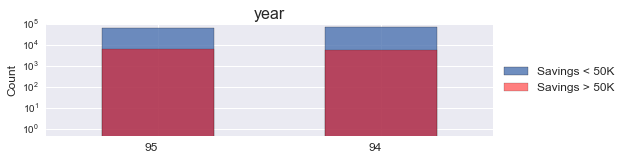

In [37]:
ax = plot_nominal_column('year', rotation=0);

## 5. The Nominal Columns with Undefined or Missing Values
There are 19 nominal columns that have undefined or missing values. The missing or undefined values generally come in the form of "Not in universe" or "?"s in some cases.

### class_of_worker
This feature has 9 classes. The value "Not in universe" is present for roughly one third of all observations. A histogram versus age is plotted below and this shows an approximately bimodal distribution. The peaks occur for ages less than 20 and greater than 60, suggesting that the majority of missing values "Not in universe" occurs for school age children and retirees.


The value "Not in universe" occurs in 35.43% of cases.




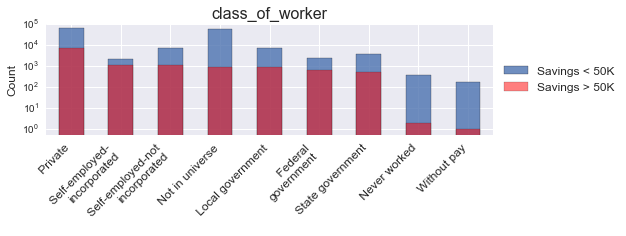

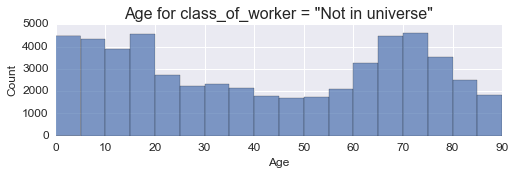

In [38]:
class_worker_na = raw_data['class_of_worker'].str.strip() == 'Not in universe'
total = raw_data['class_of_worker'].count()
print '\nThe value "Not in universe" occurs in {:.2f}% of cases.\n'.\
format(sum(class_worker_na)/float(total)*100)

plot_nominal_column('class_of_worker', text_wrap_width=18)

print 
fig=plt.figure(figsize=(8,2.0));
ax = fig.gca();
raw_data[class_worker_na].hist('age', ax=ax, bins=18, xlabelsize=12, ylabelsize=12, alpha=0.7);
ax.set_title('Age for class_of_worker = "Not in universe"', fontsize=16);
ax.set_xlabel('Age', fontsize=12);
ax.set_ylabel('Count', fontsize=12);


### reason_for_unemployment 
This variable has 6 distinct classes, displayed below. The vast majority of persons are uncategorized as "Not in universe".

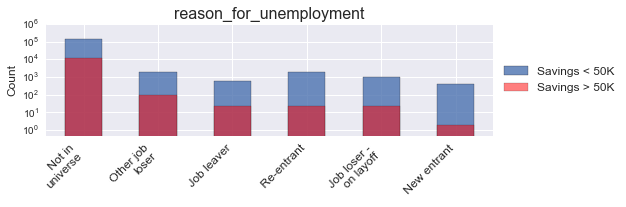

In [39]:
ax = plot_nominal_column('reason_for_unemployment', text_wrap_width=12);

### member_of_labor_union 
This variable has 3 unique classes, displayed below. The vast majority of persons are uncategorized as "Not in universe".

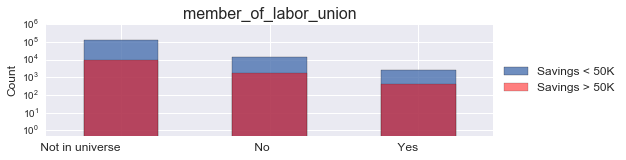

In [40]:
ax = plot_nominal_column('member_of_labor_union', rotation=0);

### enrolled_in_edu_last_week
This feature has 3 classes. As to be expected, the majority of persons in the data set were not enrolled in either high school or college in the prior week.

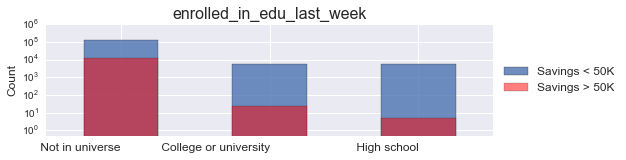

In [41]:
ax = plot_nominal_column('enrolled_in_edu_last_week', rotation=0);

### major_industry_code
This variable has 24 distinct classes. The value "Not in universe or children" occurs in approximately 36% of all cases. This is consistent with the data for the <b><i>class_of_worker</b></i> variable.



The value "Not in universe or children" occurs in 35.68% of cases.



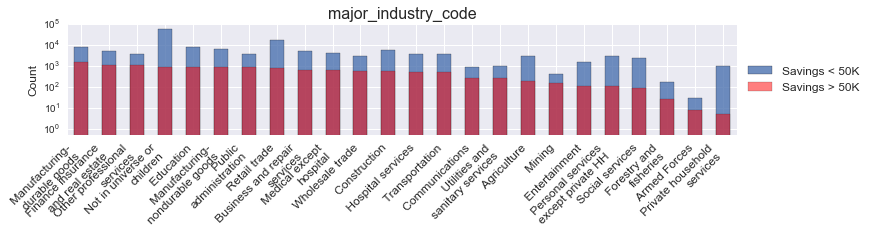

In [42]:
maj_ind_na = sum(raw_data['major_industry_code'].str.strip() == 'Not in universe or children')
total = raw_data['major_industry_code'].count()
print '\nThe value "Not in universe or children" occurs in {:.2f}% of cases.\n'.format(maj_ind_na/float(total)*100)
ax = plot_nominal_column('major_industry_code', figsize=(12,2), text_wrap_width=20);

### major_occupation_code
This variable has 15 distinct classes. The majority of persons have the "Not in universe" category. This number is consistent with the <b><i>majority_industry_code</b></i> variable.

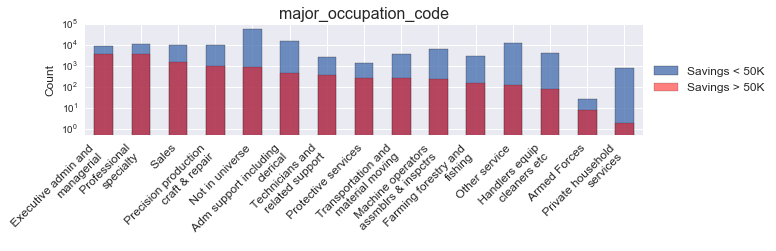

In [43]:
ax = plot_nominal_column('major_occupation_code', figsize=(10,2), text_wrap_width=22);

### hispanic_origin
This variable has 10 unique classes, displayed below. There are 848 persons with value NA. 


The count for the value "NA" is 848.



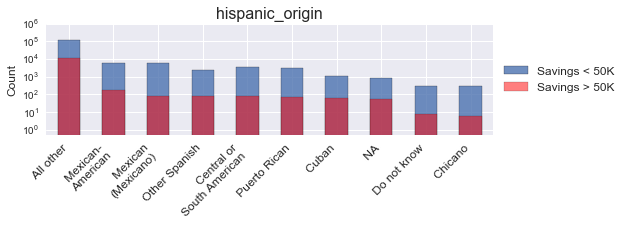

In [44]:
print '\nThe count for the value "NA" is {:d}.\n'.format((
        raw_data['hispanic_origin'].str.strip() == 'NA').sum())
ax = plot_nominal_column('hispanic_origin', text_wrap_width=16);

### region_of_previous_residence, state_of_previous_residence
The <b><i>region_of_previous_residence</b></i> variable has 6 distinct classes. The <b><i>state_of_previous_residence</b></i> variable has 51 distinct classes. Both variables have 137492 persons categorized as "Not in Universe". In addition, 698 persons are categorized with a question mark "?" for the <b><i>state_of_previous_residence</b></i>.


region_of_previous_residence value counts:

 Not in universe    137492
 South                4768
 West                 3997
 Midwest              3451
 Northeast            2661
 Abroad                527
Name: region_of_previous_residence, dtype: int64


state_of_previous_residence value counts of "?" and "Not in universe":

 Not in universe    137492
 ?                     698
Name: state_of_previous_residence, dtype: int64


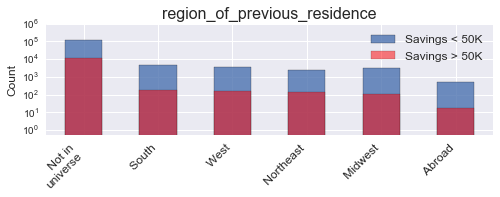

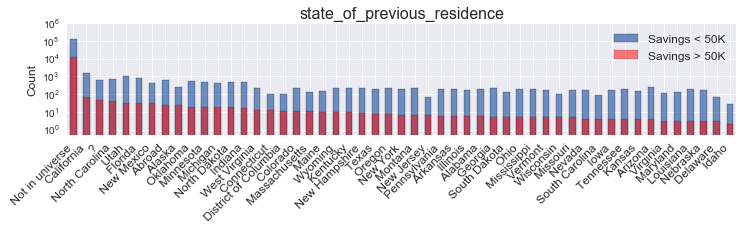

In [45]:
print "\nregion_of_previous_residence value counts:\n"
print raw_data['region_of_previous_residence'].value_counts()

spr_niu = raw_data['state_of_previous_residence'].str.strip() == "Not in universe"
spr_q = raw_data['state_of_previous_residence'].str.strip() == "?"

print '\n\nstate_of_previous_residence value counts of "?" and "Not in universe":\n'
print raw_data['state_of_previous_residence'][spr_niu | spr_q].value_counts()

ax = plot_nominal_column('region_of_previous_residence', legend_loc='in', text_wrap_width=12);
ax = plot_nominal_column('state_of_previous_residence', figsize=(12,2), legend_loc='in');


### migration_code_change_in_msa, migration_code_change_in_reg, migration_code_move_within_reg,  migration_prev_res_in_sunbelt
These variables provide some information on the person's movement within the last year. They share a lot of common classes. All four variables have an unknown class "?", which occurs the same number of times (approximately 75K). In addition, the following unknown variables are present "Not in universe", "Not identifiable".


                                 count(?)  count(Not in universe)  count(Not identifiable)    unique classes
migration_code_change_in_msa  :   74,944               344                   424                    10
migration_code_change_in_reg  :   74,944               344                     0                     9
migration_code_move_within_reg:   74,944               344                     0                    10
migration_prev_res_in_sunbelt :   74,944            62,548                     0                     4



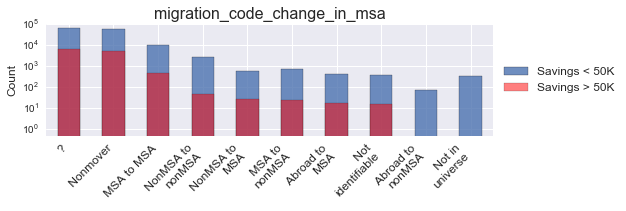

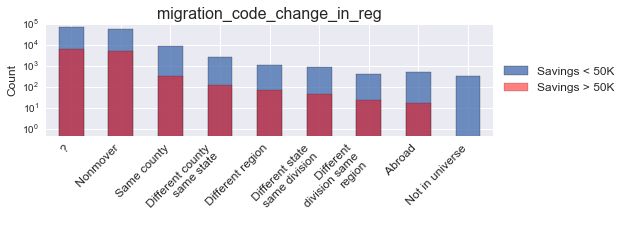

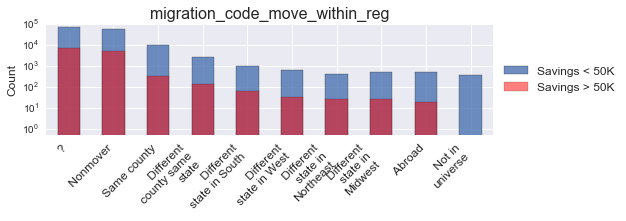

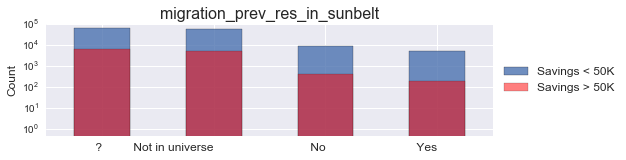

In [46]:
cols = ['migration_code_change_in_msa', 'migration_code_change_in_reg', 
        'migration_code_move_within_reg', 'migration_prev_res_in_sunbelt']
unique = []
print '\n{:>41s}{:>24s}{:>25s}{:>18s}'.format("count(?)", "count(Not in universe)", 
                                              "count(Not identifiable)", "unique classes")
for c in cols:
    print('{:30s}:{:9,d} {:17,d}{:22d}{:22d}'.format(
            c, (raw_data[c].str.strip() == "?").sum(), 
            (raw_data[c].str.strip() == "Not in universe").sum(),
            (raw_data[c].str.strip() == "Not identifiable").sum(),
            len(raw_data[c].unique())))
print 
ax = plot_nominal_column('migration_code_change_in_msa', text_wrap_width=12);
ax = plot_nominal_column('migration_code_change_in_reg', text_wrap_width=18);
ax = plot_nominal_column('migration_code_move_within_reg', text_wrap_width=14);
ax = plot_nominal_column('migration_prev_res_in_sunbelt', rotation=0);

### live_in_this_house_1_yr_ago 
This variable has 3 distinct values, displayed below. Roughly half of persons are labelled with "Not in universe under 1 year old".

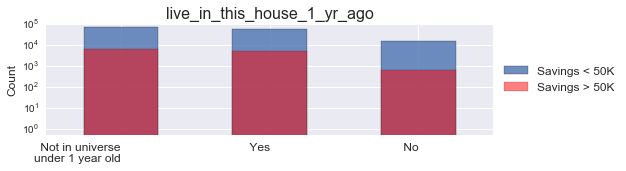

In [47]:
ax = plot_nominal_column('live_in_this_house_1_yr_ago', text_wrap_width=16, rotation=0);

### family_members_under_18
This variable has 5 distinct values, displayed below. There are three classes for which there are zero persons with savings greater than 50K. Should we combine these into one?

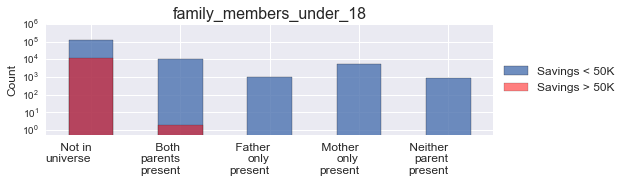

In [48]:
ax = plot_nominal_column('family_members_under_18', text_wrap_width=8, rotation=0);

### cob_father, cob_mother, cob_self
The variables <b><i>cob_father</b></i>, <b><i>cob_mother</b></i> and <b><i>cob_self</b></i> each have 43 distinct values and also have 6383, 5810 and 3322 values mapped to the question mark "?", respectively.


               count("?")   unique values
cob_father:       6383            43
cob_mother:       5810            43
  cob_self:       3322            43


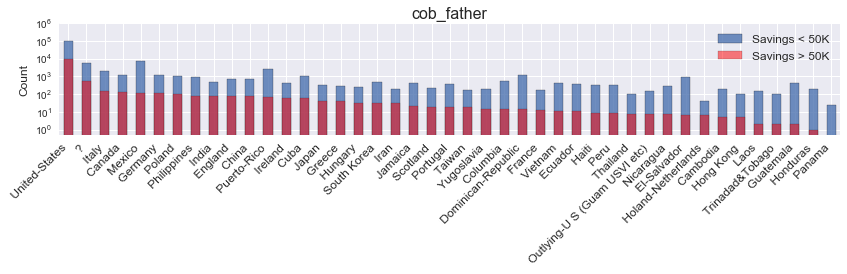

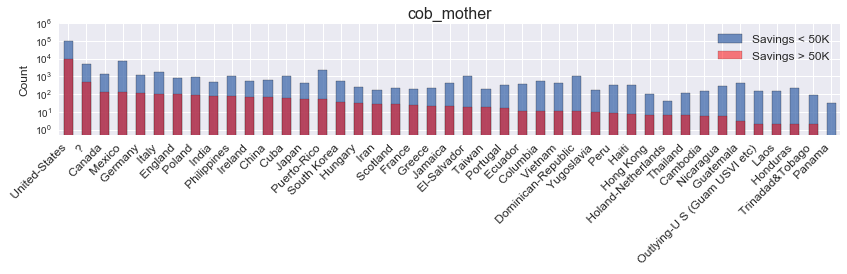

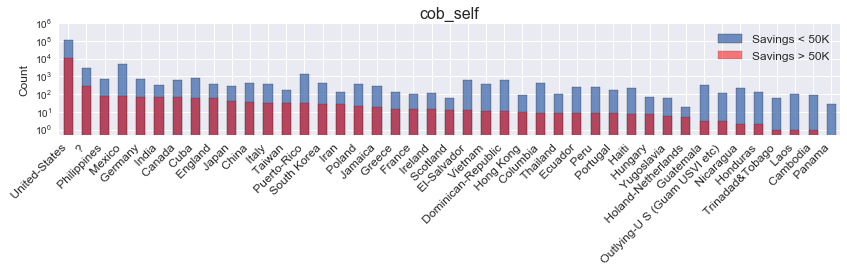

In [49]:
cobf = raw_data['cob_father'].str.strip() == "?"
cobm = raw_data['cob_mother'].str.strip() == "?"
cobs = raw_data['cob_self'].str.strip() == "?"

print '\n {:>24s} {:>15s}'.format('count("?")', 'unique values')
for name, col in zip(['cob_father', 'cob_mother', 'cob_self'],[cobf, cobm, cobs]):
    print '{:>10s}: {:10d} {:13d}'.format(name, raw_data[name][col].count(), 
                                          raw_data[name].value_counts().shape[0])

ax = plot_nominal_column('cob_father', figsize=(14,2), legend_loc='in');
ax = plot_nominal_column('cob_mother', figsize=(14,2), legend_loc='in');
ax = plot_nominal_column('cob_self', figsize=(14,2), legend_loc='in');


### fill_in_questionnaire_for_veterans_admin
This variable has 3 distinct values, as shown below. The vast majority are mapped to "Not in universe".

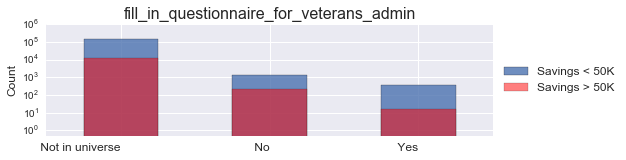

In [50]:
ax = plot_nominal_column('fill_in_questionnaire_for_veterans_admin', rotation=0);

## 6. Examination of Class Imbalance
The training data exhibits a pretty severe degree of imbalance. Approximately 91% of all persons have savings less than 50K. This means that a model that classifies every person as having less than 50K in savings will be correct roughly 91% of the time.

In [51]:
n = raw_data[raw_data['savings'] == 1]['savings'].count()
m = raw_data[raw_data['savings'] == 0]['savings'].count()
imbalance = (1.0 - float(n)/m)*100
print '\nRecords with savings > 50K: {:8,d}'.format(n)
print 'Records with savings < 50K: {:8,d}'.format(m)
print 'The class imbalance is {:.4f}% or approximately {:d} to 1.\n'.format(imbalance, m/n)


Records with savings > 50K:   12,367
Records with savings < 50K:  140,529
The class imbalance is 91.1997% or approximately 11 to 1.



The following function computes the class imbalance for a given column. It returns a DataFrame that stores the count of the number of persons for each class within the input column, broken down according to <b><i>savings</b></i>, as well as the total number of elements for each class. The class imbalance is also calculated as the fraction of rows with savings less than 50K relative to the total count for each class. A ratio of 50% means the classes are perfectly balanced. The output is stored by increasing degree of imbalance. The imbalances are displayed for a few columns for illustrative purposes.

In [52]:
def get_column_imbalance(column):
    
    no_savings = raw_data[raw_data['savings']==0][[column,'savings']].groupby(column).count()
    no_savings.columns = ['savings < 50K']
    
    has_savings = raw_data[raw_data['savings']==1][[column,'savings']].groupby(column).count()
    has_savings.columns = ['savings > 50K']
    
    total = raw_data[[column, 'savings']].groupby(column).count()
    total = total.fillna(0).astype(np.int64)
    total.columns = ['Total']
    assert total.sum().sum() == raw_data.shape[0], "The counts in the Total column are suspicious"
    
    x = pd.concat([no_savings, has_savings, total], axis=1)
    x = x.fillna(0).astype(np.int64)
    x['Imbalance'] = (1.0 - x['savings > 50K']/x['Total'])*100
    x = x.sort_values(by='Imbalance')
    return x


In [53]:
get_column_imbalance('family_members_under_18')

,savings < 50K,savings > 50K,Total,Imbalance
Not in universe,122594,12365,134959,90.837958
Both parents present,10861,2,10863,99.981589
Father only present,1028,0,1028,100.000000
Mother only present,5137,0,5137,100.000000
Neither parent present,909,0,909,100.000000


In [54]:
get_column_imbalance('class_of_worker')

,savings < 50K,savings > 50K,Total,Imbalance
class_of_worker,,,,
Self-employed-incorporated,2126,1133,3259,65.234735
Federal government,2323,597,2920,79.554795
Self-employed-not incorporated,7234,1087,8321,86.936666
State government,3736,485,4221,88.509832
Local government,6880,846,7726,89.049961
Private,64422,7316,71738,89.801779
Not in universe,53265,900,54165,98.338410
Without pay,162,1,163,99.386503
Never worked,381,2,383,99.477807


## 7. Convert Categorial Features
Two types of conversions are performed:
<ul>
<li> Convert nominal columns from text to integers for random forests
<li> One-hot encode nominal columns for logistic regression
</ul>

### Convert nominal columns from dtype Object to dtype Integer
Convert the nominal columns that have string types to integers. This is a form of preprocessing that is necessary to calculatez feature importance using random forests.

In [55]:
def convert_categorical_to_integer():
    # create new DataFrame that contains columns of type object 
    data = pd.DataFrame(raw_data.select_dtypes(include=['object']))
    columns = data.columns
    
    for column in columns:
        unique_values = data[column].unique()
        dictionary = {key:idx for idx,key in enumerate(unique_values)}
        data[column] = data[column].apply(lambda x : dictionary[x])

    return data
 

In [56]:
data = convert_categorical_to_integer()

# add nominal columns that were already integer and didn't need to be converted
nominal_integer_columns = [c[0] for c in the_columns 
                           if c[1] == 'nominal' 
                           and c[0] not in data.columns]
data[nominal_integer_columns] = raw_data[nominal_integer_columns]

# add 'sex' column
data['sex'] = raw_data['sex']

# add continuous columns
continuous_columns = [c[0] for c in the_columns if c[1] == 'continuous']
data[continuous_columns] = raw_data[continuous_columns]

# add target (savings)
data['savings'] = raw_data['savings']

# verify that we aren't missing any columns
assert set(data.columns) == (set(raw_data.columns))

print 'The final shape is: {:,d} x {:d}.\n'.format(data.shape[0], data.shape[1])

The final shape is: 152,896 x 41.



In [57]:
data.iloc[:10, :8].head()

,class_of_worker,education,enrolled_in_edu_last_week,marital_status,major_industry_code,major_occupation_code,race,hispanic_origin
0,0,0,0,0,0,0,0,0
1,1,1,0,1,1,1,0,0
2,0,2,1,2,0,0,1,0
3,0,3,0,2,0,0,0,0
4,0,3,0,2,0,0,0,0


## One-Hot Encode Categorical Variables and Scale Continuous Variables
Convert categorical features to boolean features using one-hot encoding and scale the continuous variables to be between 0 and 1.

In [58]:
from sklearn.preprocessing import MinMaxScaler

In [59]:
def one_hot_encode_nominal_columns():
    nominal_columns = [c[0] for c in the_columns if c[1] == 'nominal']
    
    dummy_columns = [pd.get_dummies(raw_data[col], prefix=col, prefix_sep='.') 
                     for col in nominal_columns]
    
    one_hot_encoded_data = pd.concat(dummy_columns, axis=1)
    print '\nThere were {:d} nominal columns to be converted.'.format(len(nominal_columns))
    print 'The number of one-hot-encoded columns is {:d}.\n'.format(data.shape[1])
    
    # check size
    count_distinct_values = 0
    for column in nominal_columns:
        count_distinct_values += len(raw_data[column].unique())
    
    assert count_distinct_values == one_hot_encoded_data.shape[1], \
        "mismatch between number of dummy columns and unique values"
    
    return one_hot_encoded_data

In [60]:
ohe_data = one_hot_encode_nominal_columns()

# add target (savings)
ohe_data['savings'] = raw_data['savings']

# scale and add continuous columns
min_max_scaler = MinMaxScaler()
continuous_cols = [c[0] for c in the_columns if c[1] == 'continuous']
ohe_data[continuous_cols] = pd.DataFrame(min_max_scaler.fit_transform(
        raw_data[continuous_cols]), columns=continuous_cols, index = raw_data.index)

print 'The final shape is: {:,d} x {:d}.'.format(ohe_data.shape[0], ohe_data.shape[1])
mx = ohe_data.max().max()
mn = ohe_data.min().min()
print 'To verify scaling: max = {:.2f}, min={:.2f}\n'.format(mx, mn)


There were 33 nominal columns to be converted.
The number of one-hot-encoded columns is 41.

The final shape is: 152,896 x 561.
To verify scaling: max = 1.00, min=0.00



## 8. Feature Importance and Unimportance
We run some random forests and logistic regressions to examine the feature importance and unimportance, respectively. The purpose is not to develop an optimized and highly-tuned classification model, but to use models to get a notion of the importance of the features in the data set. We perform cross-validation just to make sure the models produce reasonable results, though stress that accuracy is not the goal.

In [61]:
from sklearn.cross_validation import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

### Random Forest
We train a random forest with 10 trees each limited to a max depth of 10 leaves, report the accuracy and then plot the feature importances for the top 10 most important features.

In [62]:
# obtain training and test set for cross-validation
y = data.loc[:,'savings']
X = data.drop('savings', axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
print 'size of training data: {:7d}, {:3d}'.format(X_train.shape[0], X_train.shape[1])
print 'size of test data:     {:7d}, {:3d}\n'.format(X_test.shape[0], X_test.shape[1])

ytr0, ytr1 = (y_train == 0).sum(), (y_train == 1).sum()
yte0, yte1 = (y_test == 0).sum(), (y_test == 1).sum()
print 'y_train==0: {:6d},  y_train==1: {:4d},  balance: {:.4f}'.format(
    ytr0, ytr1, float(ytr0)/(ytr0+ytr1))
print 'y_test==0:  {:6d},  y_test==1:  {:4d},  balance: {:.4f}'.format(
    yte0, yte1, float(yte0)/(yte0+yte1))
print '\nThe training and test set appear to have the same degree of class imbalance.\n'

size of training data:  107027,  40
size of test data:       45869,  40

y_train==0:  98399,  y_train==1: 8628,  balance: 0.9194
y_test==0:   42130,  y_test==1:  3739,  balance: 0.9185

The training and test set appear to have the same degree of class imbalance.



In [63]:
# Train random forest using 10 trees

rf_clf = RandomForestClassifier(n_estimators = 10, max_depth=10)
rf_clf.fit(X_train, y_train)

y_pred = rf_clf.predict(X_test)
print 'Random Forest accuracy = {:.4f}'.format(accuracy_score(y_test, y_pred))

importances = rf_clf.feature_importances_
rf_idx = np.argsort(importances)


Random Forest accuracy = 0.9366


In [64]:
def top_n_feature_importance(n, importances, columns, figsize=(9,14)):
    n = min(n,len(importances))
    
    indices = np.argsort(importances)
    idx = indices[-n:]
    labels = [text for text in columns[idx]]
    
    plt.figure(figsize=figsize)
    plt.title("Top {:d} Feature Importances".format(n), fontsize=16)
    plt.barh(bottom=range(n), width=importances[idx], alpha=0.5)
    plt.yticks([0.4 + k for k in range(n)], labels, fontsize=12)
    plt.ylim([0, n])
    plt.xticks(fontsize=12)
    plt.show()

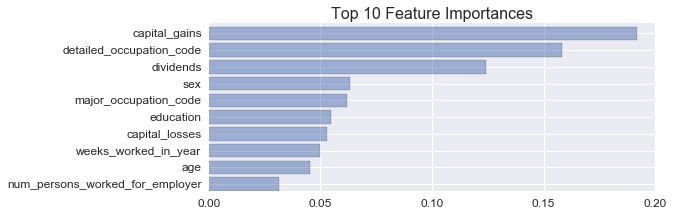

In [65]:
top_n_feature_importance(10, importances, X.columns, figsize=(8,3))

### Random Forest Against Each Feature
Here we run a Random Forest for each individual feature against the <b><i>savings</b></i> variable. Each random forest has 10 trees and the max depth is set to 10. The cross-validation uses stratified 3-fold validation, where each fold preserves the class imbalance in the target variable. Since this exercise neglects the correlations and relations between independent variables, the goal is not to obtain an accurate predictor, but rather to get a sense of feature importance when each feature is examined in isolation. 

In [66]:
from sklearn.cross_validation import cross_val_score, ShuffleSplit
from sklearn.cross_validation import StratifiedKFold

rf = RandomForestClassifier(n_estimators=10, max_depth=10)
scores = []
for column in X.columns:
    score = cross_val_score(rf, pd.DataFrame(X[column]), y, 
                            scoring="accuracy", cv=StratifiedKFold(y,4))
    scores.append((round(np.mean(score), 6), column))


We print the top five results ranked by decreasing accuracy.

In [67]:
print sorted(scores, reverse=True)[:5]

[(0.929383, 'capital_gains'), (0.923412, 'capital_losses'), (0.922065, 'detailed_occupation_code'), (0.920403, 'education'), (0.920155, 'dividends')]


### Logistic Regression with L2 Regularization
We use the one-hot-encoded data set for logistic regression and find all columns whose coefficients are closest to 0. This gives us a sense for the features that are least important. The actual results apply to the one-hot encoded columns, but we map these back to the original columns as long as the majority of the classes are deemed to be unimportant. A feature is deemed to be unimportant if it's coefficient is less than 5% of the max and min.

In [68]:
# obtain training and test from one-hot encoded data set for cross-validation
y = ohe_data.loc[:,'savings']
X = ohe_data.drop('savings', axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
print 'size of training data: {:7d}, {:3d}'.format(X_train.shape[0], X_train.shape[1])
print 'size of test data:     {:7d}, {:3d}'.format(X_test.shape[0], X_test.shape[1])
ytr0, ytr1 = (y_train == 0).sum(), (y_train == 1).sum()
yte0, yte1 = (y_test == 0).sum(), (y_test == 1).sum()
print 'y_train==0: {:6d},  y_train==1: {:4d},  balance: {:.4f}'.format(ytr0, ytr1, float(ytr0)/(ytr0+ytr1))
print 'y_test==0:  {:6d},  y_test==1:  {:4d},  balance: {:.4f}'.format(yte0, yte1, float(yte0)/(yte0+yte1))
print 'The training and test set appear to have the same degree of class imbalance.\n'

size of training data:  107027, 560
size of test data:       45869, 560
y_train==0:  98399,  y_train==1: 8628,  balance: 0.9194
y_test==0:   42130,  y_test==1:  3739,  balance: 0.9185
The training and test set appear to have the same degree of class imbalance.



In [69]:
# run Ridge Logistic Regression
lr2_clf = LogisticRegression(C=0.1, penalty='l2')
lr2_clf.fit(X_train, y_train)
y_pred = lr2_clf.predict(X_test)
print 'accuracy = {:.4f}'.format(accuracy_score(y_test, y_pred))

accuracy = 0.9343


In [70]:
def get_column_prefix_and_rate_of_occurence(indices):
    '''
    input: a set of column indices for the one-hot encoded data set
    output: a Counter (dictionary object) the column names of original data set
    along with the ratio of the corresponding number of one-hot encoded column names
    in the input indices to the total number of classes for that column name.
    Example:
      if indices contain following colums x.1, x.3, x.7
      and the original data set contains the following unique classes in column x:
      1, 2, ... 10
      then the result is x : 0.3
    '''
    column_names = Counter()
    for item in indices:
        col = X.columns[item]
        #print col
        dot = col.find('.')
        if dot > 0:
            column_names[col[:dot]] += 1
        else:
            column_names[col] += 1
    # compute ratio of number of suffixes to prefix
    for k,v in column_names.iteritems():
        #print k,v, len(raw_data[k].unique())
        column_names[k] = float(v) / len(raw_data[k].unique())

    return column_names


In [71]:
coef2 = lr2_clf.coef_.ravel() # coefficients from logistic regression
mx, mn, sd = coef2.max(), coef2.min(), coef2.std()
text = 'L2 regression coeffs:\nsize = {:d}, min = {:.4f}, max = {:.4f}, std = {:.4f}\n'
print text.format(coef2.shape[0], mn, mx, sd)

small_indices = [k for k,c in enumerate(coef2) if c < mx/20. and c > mn/20.]

temp = get_column_prefix_and_rate_of_occurence(small_indices)

for k,v in temp.most_common(10):
    if v > 0.5:
        print '{:35s} : {:.4f}'.format(k,v)


L2 regression coeffs:
size = 560, min = -1.5310, max = 4.4283, std = 0.4143

detailed_household_family_stat      : 0.7632
full_or_part_time_employment_stat   : 0.7500
tax_filer                           : 0.6667
state_of_previous_residence         : 0.6078
cob_father                          : 0.6047
migration_code_change_in_msa        : 0.6000
marital_status                      : 0.5714
migration_code_change_in_reg        : 0.5556
cob_self                            : 0.5349
cob_mother                          : 0.5349


### Logistic Regression with L1 Regularization
We use the one-hot-encoded data set for logistic regression and find all columns whose coefficients are closest to 0. This allows us to identify the features that are least important. The analysis applies to the one-hot encoded columns, but we map these back to the original columns as long as the majority of the classes have coefficient 0.

In [72]:
# run Ridge Logistic Regression
lr1_clf = LogisticRegression(C=0.1, penalty='l1')
lr1_clf.fit(X_train, y_train)
y_pred = lr1_clf.predict(X_test)
print 'accuracy = {:.4f}'.format(accuracy_score(y_test, y_pred))

accuracy = 0.9356


In [73]:
coef1 = lr1_clf.coef_.ravel()
mx, mn, sd = coef1.max(), coef1.min(), coef1.std()
text = 'L2 regression coeffs:\nsize = {:d}, min = {:.4f}, max = {:.4f}, std = {:.4f}\n'
print text.format(coef1.shape[0], mn, mx, sd)

small_indices = [k for k,c in enumerate(coef1) if c == 0.0]
temp = get_column_prefix_and_rate_of_occurence(small_indices)

for k,v in temp.most_common(15):
    if v > 0.5:
        print '{:40s} : {:.4f}'.format(k,v)


L2 regression coeffs:
size = 560, min = -1.5291, max = 12.9980, std = 0.6968

reason_for_unemployment                  : 1.0000
year                                     : 1.0000
migration_code_move_within_reg           : 1.0000
migration_code_change_in_reg             : 1.0000
veterans_benefits                        : 1.0000
family_members_under_18                  : 1.0000
state_of_previous_residence              : 1.0000
cob_mother                               : 0.9767
cob_self                                 : 0.9535
detailed_household_family_stat           : 0.9474
cob_father                               : 0.9302
migration_code_change_in_msa             : 0.9000
weeks_worked_in_year                     : 0.8302
migration_prev_res_in_sunbelt            : 0.7500
hispanic_origin                          : 0.7000
